# **<font color="#0000ff">REGULARIZACIÓN</font>**

Las estrategias de regularización incorporan penalizaciones en el ajuste por mínimos cuadrados ordinarios (OLS) con el objetivo de evitar overfitting, reducir varianza, atenuar el efecto de la correlación entre predictores y minimizar la influencia en el modelo de los predictores menos relevantes. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo (generalización).

In [ ]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importar data, manejar variable cualitativa y eliminar id
datos = pd.read_csv('3.1 Boston.csv', sep=";")
datos['chas'] = datos['chas'].astype('object')
datos=datos.drop(columns = ["id"])#, "chas"])
datos

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# observando la estructura de la data
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    object 
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


In [ ]:
# Correlación entre columnas numéricas
# Función para convertir una matriz de correlación de pandas en formato tidy
def tidy_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(10))

,variable_1,variable_2,r,abs_r
111,tax,rad,0.910228,0.910228
99,rad,tax,0.910228,0.910228
81,dis,nox,-0.769230,0.769230
45,nox,dis,-0.769230,0.769230
41,nox,indus,0.763651,0.763651
29,indus,nox,0.763651,0.763651
71,age,dis,-0.747881,0.747881
83,dis,age,-0.747881,0.747881
167,medv,lstat,-0.737663,0.737663
155,lstat,medv,-0.737663,0.737663


In [ ]:
# Seleccionando variables independientes y dependiente
X = datos[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]
y = datos['medv']

In [ ]:
# División de los datos en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# observando la data X_train, data de entrenamiento
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
221,0.40771,0.0,6.20,1,0.5070,6.164,91.3,3.0480,8,307,17.4,395.24,21.46
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44
450,6.71772,0.0,18.10,0,0.7130,6.749,92.6,2.3236,24,666,20.2,0.32,17.44
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32
402,9.59571,0.0,18.10,0,0.6930,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88
53,0.04981,21.0,5.64,0,0.4390,5.998,21.4,6.8147,4,243,16.8,396.90,8.43
294,0.08199,0.0,13.92,0,0.4370,6.009,42.3,5.5027,4,289,16.0,396.90,10.40
211,0.37578,0.0,10.59,1,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98


In [ ]:
# Escalando las variables independientes
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# preparando la data en formato pandas
df_train = pd.DataFrame(X_train_std, columns=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"])
print(df_train)

df_test = pd.DataFrame(X_test_std, columns=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"])
print(df_test)

         crim        zn     indus      chas       nox        rm       age  \
0   -0.368403 -0.469675 -0.731832  3.595975 -0.423937 -0.165276  0.807027   
1    1.976926 -0.469675  1.020825 -0.278089  0.989336  1.499446  1.045658   
2    0.402325 -0.469675  1.020825 -0.278089  1.351272  0.682298  0.854030   
3   -0.232663 -0.469675  1.238803  3.595975  0.420580  3.038119  0.901033   
4    0.753854 -0.469675  1.020825 -0.278089  1.178922  0.182447  1.121587   
..        ...       ...       ...       ...       ...       ...       ...   
399 -0.415748  3.654826 -1.250265 -0.278089 -1.207270  2.544063 -1.340654   
400 -0.412118  0.442057 -0.814310 -0.278089 -1.009929 -0.405784 -1.720295   
401 -0.408187 -0.469675  0.405186 -0.278089 -1.027164 -0.389847 -0.964629   
402 -0.372303 -0.469675 -0.085263  3.595975 -0.579053 -1.266398  0.709405   
403 -0.405988  1.006462 -0.748033 -0.278089 -1.061634  1.019879 -1.854073   

          dis       rad       tax   ptratio     black     lstat  
0   -0.34

# **<font color="#0000ff">MODELOS</font>**
Se ajustan varios modelos lineales con y sin regularización, con el objetivo de identificar cuál de ellos es capaz de predecir mejor

# <font color="#0000ff">Minimos cuadrados (OLS)</font>

In [ ]:
# Creación y entrenamiento del modelo
# ===================================
modelo = LinearRegression()
modelo.fit(X = df_train, y = y_train)

LinearRegression()

In [ ]:
# Coeficientes del modelo
# ======================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )
df_coeficientes

,predictor,coef
0,crim,-0.835371
1,zn,1.384637
2,indus,0.236077
3,chas,0.775287
4,nox,-2.368977
5,rm,1.997257
6,age,-0.147234
7,dis,-3.492312
8,rad,2.959085
9,tax,-2.279724


evaluamos el modelo

In [ ]:
# Predicciones test
# ================
predicciones = modelo.predict(X=df_test)
predicciones = predicciones.flatten()
predicciones[:7]

array([21.3202139 , 23.90902024, 12.26940741, 22.08196347, 14.21128569,
       27.22686482, 21.0182243 ])

In [ ]:
# Error de test del modelo
# =========================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) es: {rmse_ols}")


El error (rmse) es: 4.895362232251753


# <font color="#0000ff">Ridge</font>

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ===========================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            #normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = df_train, y = y_train)

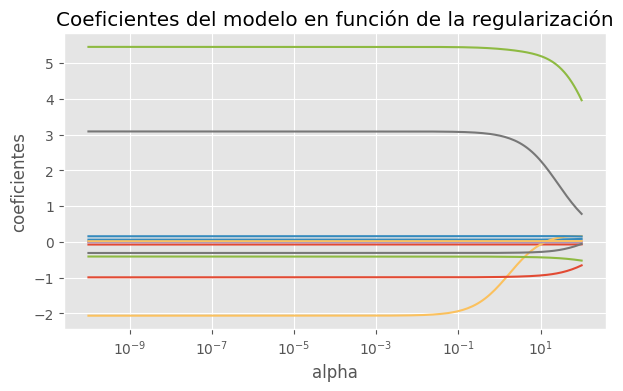

In [ ]:
# Evolución de los coeficientes en función de alpha
# ===============================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)#, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

A medida que aumenta el valor de alpha, la regularización es mayor y el valor de los coeficientes se reduce.

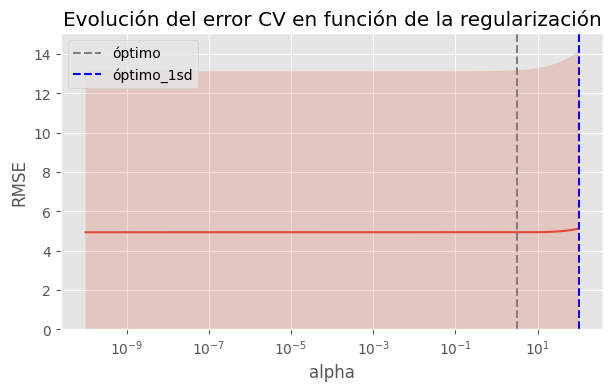

In [ ]:
# Evolución del error en función de alpha
# ========================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

el optimo esta entre 10-1 y 10+1

In [ ]:
# Mejor valor alpha encontrado
# =============================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 3.107866187782014


In [ ]:
# Coeficientes del modelo
# =======================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )
df_coeficientes

,predictor,coef
0,crim,-0.799739
1,zn,1.319413
2,indus,0.134461
3,chas,0.787344
4,nox,-2.243120
5,rm,2.040150
6,age,-0.165933
7,dis,-3.364215
8,rad,2.652260
9,tax,-1.986719


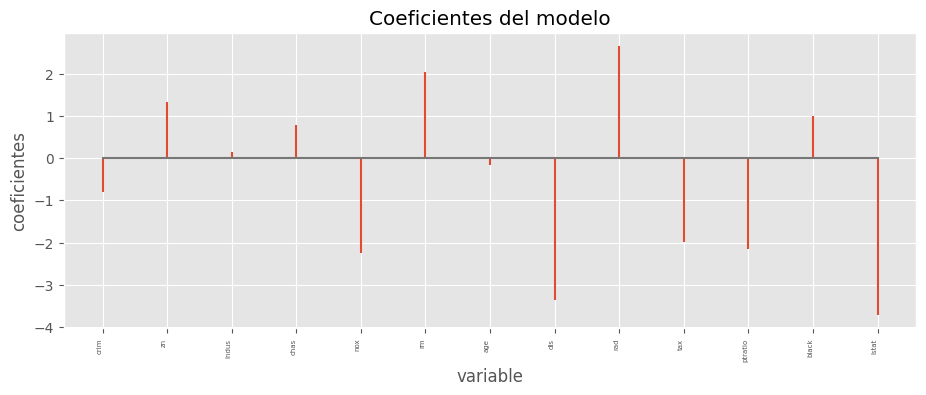

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ================
predicciones = modelo.predict(X=df_test)
predicciones = predicciones.flatten()
predicciones[:7]

array([21.5605516 , 24.02605427, 12.32243638, 22.02605648, 14.28224105,
       27.11963463, 21.08634902])

In [ ]:
# Error de test del modelo
# ==========================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 4.8665542251284855


# <font color="#0000ff">Lasso</font>

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# =====================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            #normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = df_train, y = y_train)

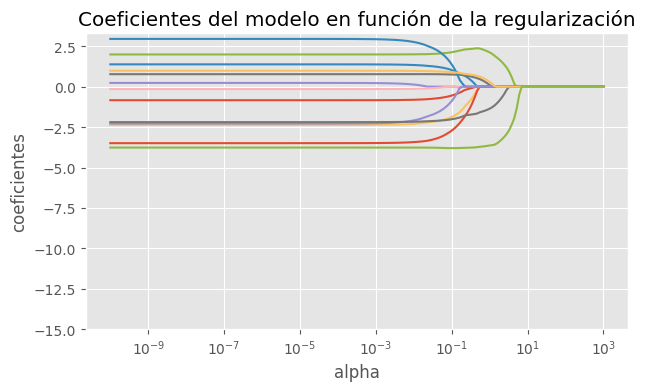

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)#, normalize=True)
    modelo_temp.fit(df_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

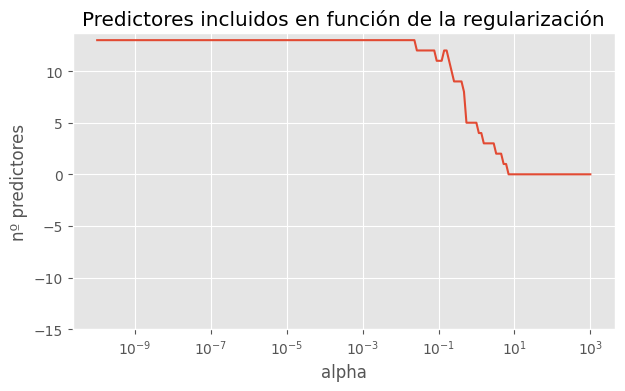

In [ ]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ====================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)#, normalize=True)
    modelo_temp.fit(df_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

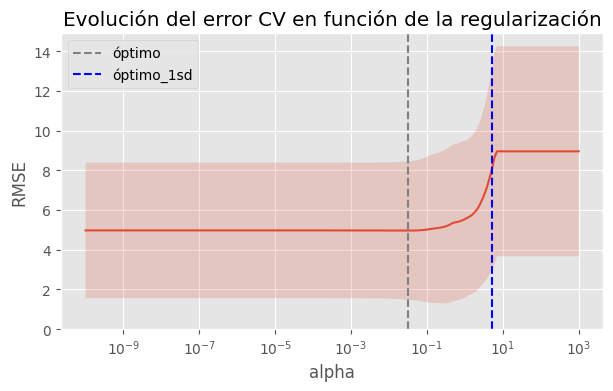

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.03107866187782014


In [ ]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [5.17092024]


Se entrena de nuevo el modelo, esta vez empleando el mayor valor de alpha cuyo error está a menos de una desviación típica del mínimo encontrado en la validación cruzada

In [ ]:
# Mejor modelo alpha óptimo + 1sd
# ===============================
# modelo = Lasso(alpha=optimo_1sd)#, normalize=True)
# modelo.fit(df_train, y_train)

In [ ]:
# Coeficientes del modelo
# ================================
# df_coeficientes = pd.DataFrame(
#                        {'predictor': X_train.columns,
#                         'coef': modelo.coef_.flatten()}
#                  )
# Predictores incluidos en el modelo (coeficiente != 0)
# df_coeficientes[df_coeficientes.coef != 0]

In [ ]:
# fig, ax = plt.subplots(figsize=(11, 3.84))
# ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
# plt.xticks(rotation=90, ha='right', size=5)
# ax.set_xlabel('variable')
# ax.set_ylabel('coeficientes')
# ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ================================================
# predicciones = modelo.predict(X=X_test)
# predicciones = predicciones.flatten()
# predicciones[:10]

In [ ]:
# Error de test del modelo
# ================================================
# rmse_lasso = mean_squared_error(
#                y_true  = y_test,
#                y_pred  = predicciones,
#                squared = False
#             )
# print("")
# print(f"El error (rmse) de test es: {rmse_lasso}")

# <font color="#0000ff">Elastic net</font>

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# =========================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            #normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = df_train, y = y_train)

In [ ]:
# Evolución del error en función de alpha y l1_ratio
# =========================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
1269,0.99,0.031079,24.649227,4.964799
1270,0.99,0.026738,24.650054,4.964882
1069,0.95,0.031079,24.650662,4.964943
1070,0.95,0.026738,24.650943,4.964972
1268,0.99,0.036123,24.651309,4.965008
...,...,...,...,...
601,0.70,860.346442,80.177188,8.954172
602,0.70,740.196000,80.177188,8.954172
603,0.70,636.824994,80.177188,8.954172
605,0.70,471.375313,80.177188,8.954172


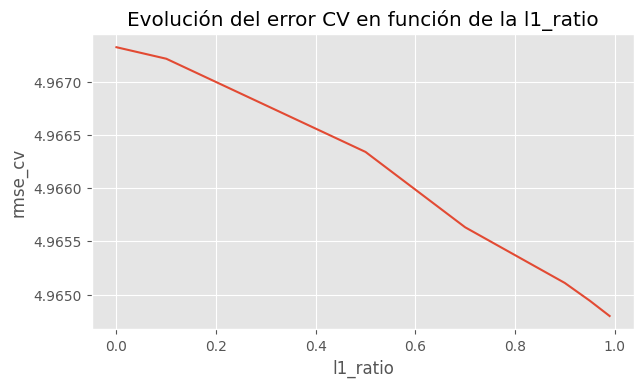

In [ ]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 0.03107866187782014
Mejor valor de l1_ratio encontrado: 0.99


In [ ]:
# Coeficientes del modelo
# ===================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )
df_coeficientes

,predictor,coef
0,crim,-0.747185
1,zn,1.263680
2,indus,0.000000
3,chas,0.778035
4,nox,-2.167997
5,rm,2.029617
6,age,-0.092333
7,dis,-3.273495
8,rad,2.395699
9,tax,-1.724059


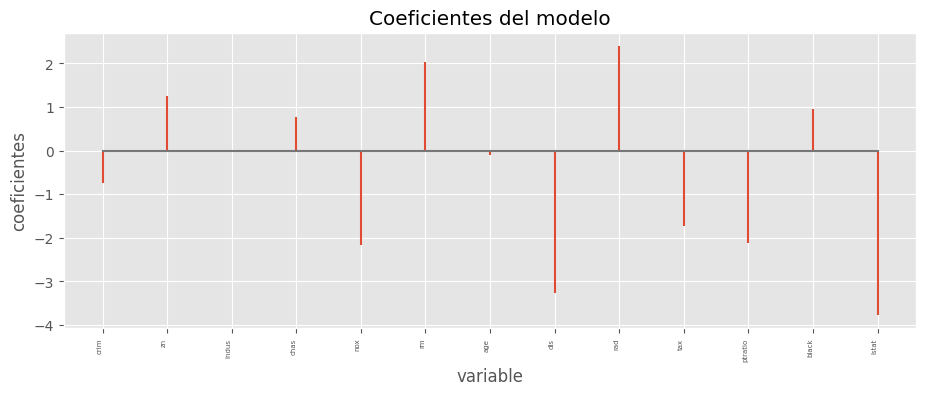

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');




In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [ ]:
# Error de test del modelo
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 523.3542962357827


# <font color="#0000ff">COMPARACIÓN DE MODELOS</font>

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['OLS', 'Ridge',  'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge,  rmse_elastic]
                 })
df_comparacion

,modelo,test rmse
0,OLS,4.895362
1,Ridge,4.866554
2,Elastic-net,523.354296


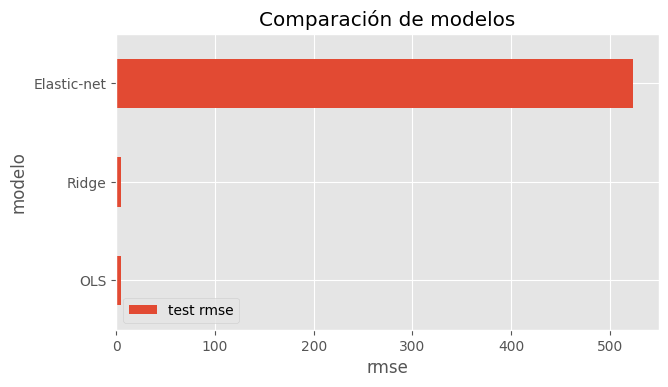

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

El error (rmse) del modelo inicial obtenido era:
4.58421158188693